<a href="https://colab.research.google.com/github/Cehiim/InteligenciaArtificial/blob/main/Atv2/A2_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [27]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402758, Cesar Hideki Imai' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

*Apresente um parágrafo resumindo o que é feito neste trabalho*.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **Pacotes**

In [28]:
%pip install pyvis

## **1. Grafo das cidades (2,0)**

### Definindo cidades

In [91]:
# Lista de cidades com a distância dos dois vizinhos mais próximos
cidades = [
    {'nome': 'São Paulo', 'vizinhos': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 56]},
    {'nome': 'Campinas', 'vizinhos': [0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 85, 0]},
    {'nome': 'Santos', 'vizinhos': [72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0]},
    {'nome': 'São José dos Campos', 'vizinhos': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 43]},
    {'nome': 'Ribeirão Preto', 'vizinhos': [0, 0, 0, 0, 0, 0, 148, 0, 87, 0, 0, 0]},
    {'nome': 'Sorocaba', 'vizinhos': [0, 86, 0, 0, 0, 0, 0, 0, 0, 52, 0, 0]},
    {'nome': 'Bauru', 'vizinhos': [0, 0, 0, 0, 148, 0, 0, 0, 159, 0, 0, 0]},
    {'nome': 'Presidente Prudente', 'vizinhos': [0, 0, 0, 0, 281, 0, 273, 0, 0, 0, 0, 0]},
    {'nome': 'São Carlos', 'vizinhos': [0, 105, 0, 0, 87, 0, 0, 0, 0, 0, 0, 0]},
    {'nome': 'Jundiaí', 'vizinhos': [0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0]},
    {'nome': 'Guarulhos', 'vizinhos': [18, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0]},
    {'nome': 'Mogi das Cruzes', 'vizinhos': [56, 0, 0, 43, 0, 0, 0, 0, 0, 0, 0, 0]}
]

# Método para converter grafo não-direcionado para grafo direcionado
def grafo_direcionado(grafo):
  i = 0
  for vertice in grafo:
    j = 0
    for vizinho in vertice['vizinhos']:
      if(vizinho != 0):
        grafo[j]['vizinhos'][i] = vizinho

      j += 1

    i += 1

  return grafo

# Converter grafo
cidades = grafo_direcionado(cidades)

In [92]:
import pandas as pd

# Converter para um dataframe/tabela
df = pd.DataFrame(cidades)

# Expandir a lista de vizinhos de cada cidade e nomear cada cidade vizinha
df = df.join(pd.DataFrame(df.pop("vizinhos").to_list(), columns=[cidades[i]["nome"] for i in range(12)])) #
df

,nome,São Paulo,Campinas,Santos,São José dos Campos,Ribeirão Preto,Sorocaba,Bauru,Presidente Prudente,São Carlos,Jundiaí,Guarulhos,Mogi das Cruzes
0,São Paulo,0,0,72,0,0,0,0,0,0,0,18,56
1,Campinas,0,0,0,0,0,86,0,0,105,42,85,0
2,Santos,72,0,0,0,0,0,0,0,0,0,66,0
3,São José dos Campos,0,0,0,0,0,0,0,0,0,0,70,43
4,Ribeirão Preto,0,0,0,0,0,0,148,281,87,0,0,0
5,Sorocaba,0,86,0,0,0,0,0,0,0,52,0,0
6,Bauru,0,0,0,0,148,0,0,273,159,0,0,0
7,Presidente Prudente,0,0,0,0,281,0,273,0,0,0,0,0
8,São Carlos,0,105,0,0,87,0,159,0,0,0,0,0
9,Jundiaí,0,42,0,0,0,52,0,0,0,0,40,0


### Definindo grafo

Função para adicionar vértices no grafo interativo

In [31]:
def imprimirVertices(grafo, n, cidades):
  for i in range(n):

    # Adiciona vértices
    grafo.add_node(
        i,
        title=cidades[i]["nome"],
        label=cidades[i]["nome"],
        color="white"
        )

Função para adicionar arestas no grafo interativo

In [71]:
def imprimirArestas(grafo, n, cidades):
  for i in range(n):
    for j in range(n):
      peso = cidades[i]["vizinhos"][j]

      if(peso != 0):

        # Adiciona as arestas
        grafo.add_edge(
            i,
            j,
            value=400/peso,
            length=4*peso,
            smooth=False,
            title=f'''
            {cidades[i]["nome"]} ---- {cidades[j]["nome"]}
            Distância: {peso}
            ''',
            color="yellow"
            )

Definindo grafo interativo

In [73]:
from pyvis.network import Network

#Criar grafo
grafo = Network(notebook=True, cdn_resources='in_line', directed=False, height="1200px", width="100%", bgcolor="black", font_color="white")

imprimirVertices(grafo, 12, cidades)
imprimirArestas(grafo, 12, cidades)

# Espalhar os nós no espaço para evitar sobreposição
grafo.repulsion(node_distance=800)

# Salvar o grafo (Não é possível mostrar o grafo diretamente pelo Jupyter Notebook)
grafo.show("grafo.html")

grafo.html


> ## **1.1. Resultados (Testes)**

O grafo feito com a biblioteca Pyvis possibilita uma maior interatividade. Além disso, tanto a distância, quanto a grossura das arestas são proporcionais aos valores dos pesos.

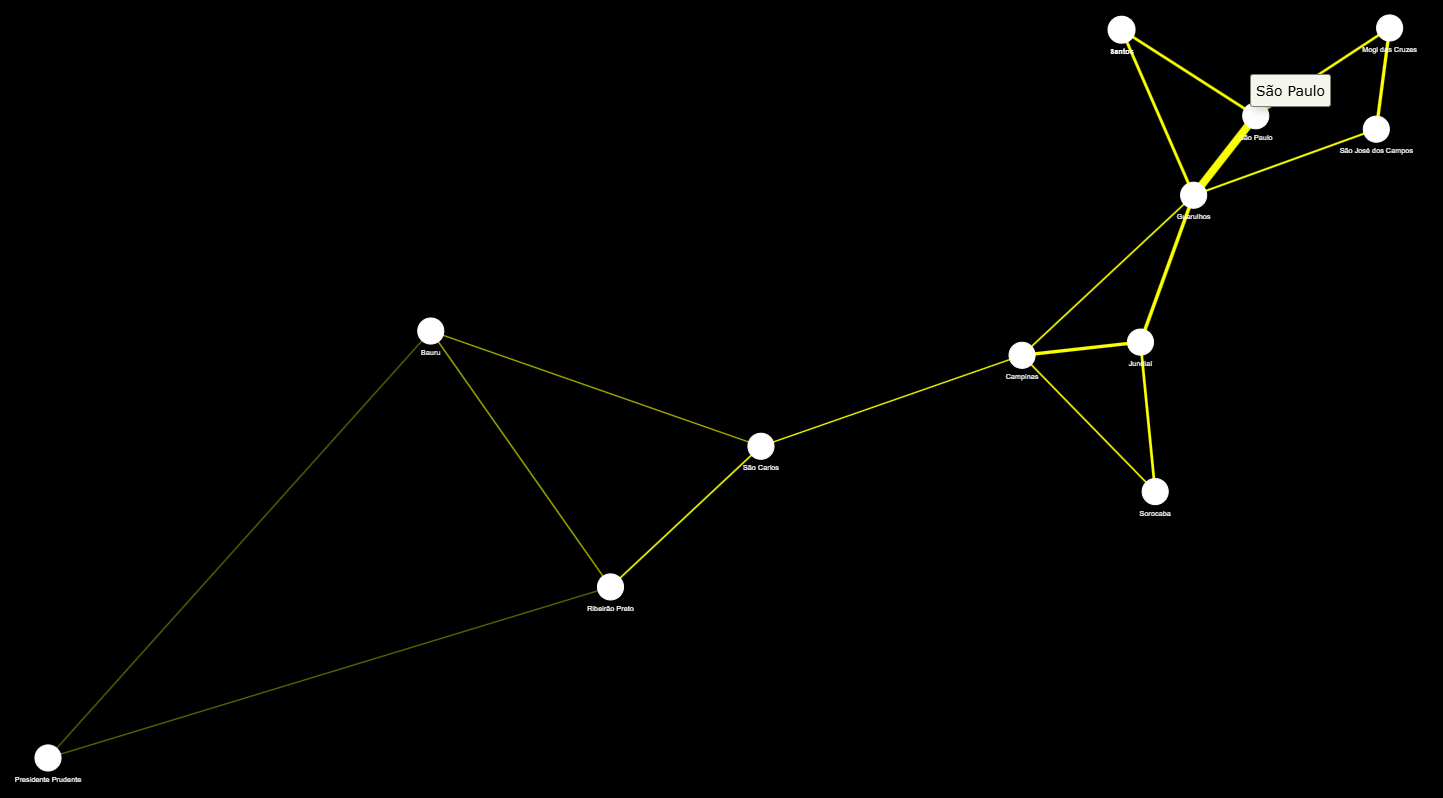

### Observações

Para acessar o resultado, é necessário baixar o arquivo `grafo.html` e abrir.

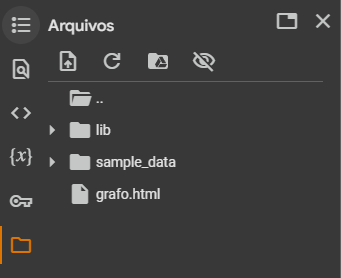

É possível dar zoom.

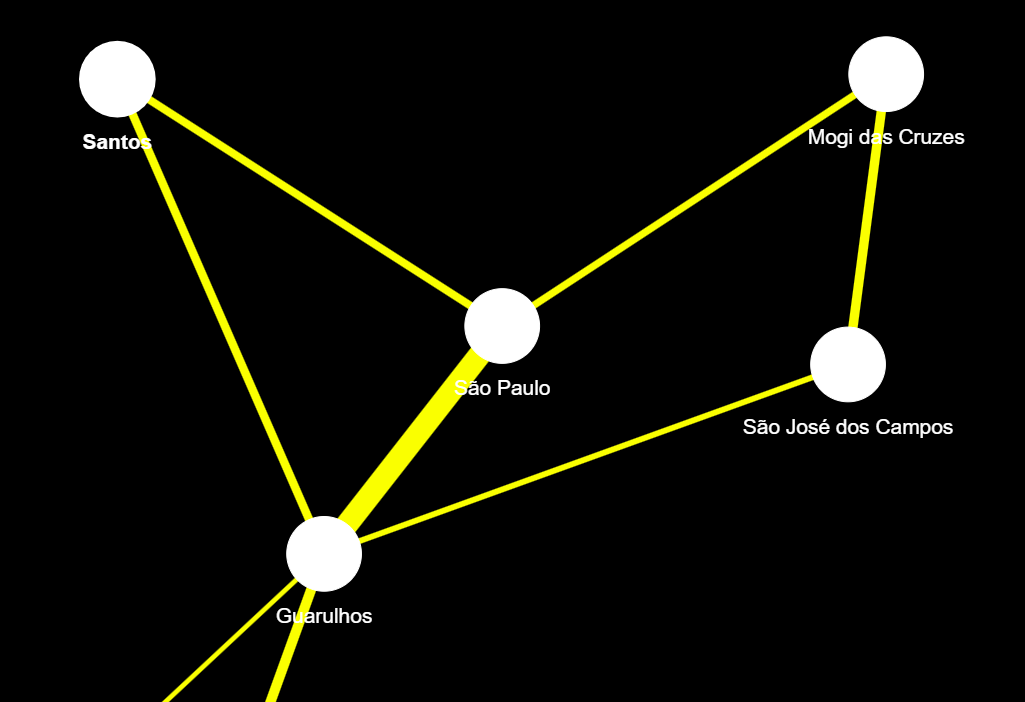

E também visualizar o valor de cada aresta encostando com o cursor.

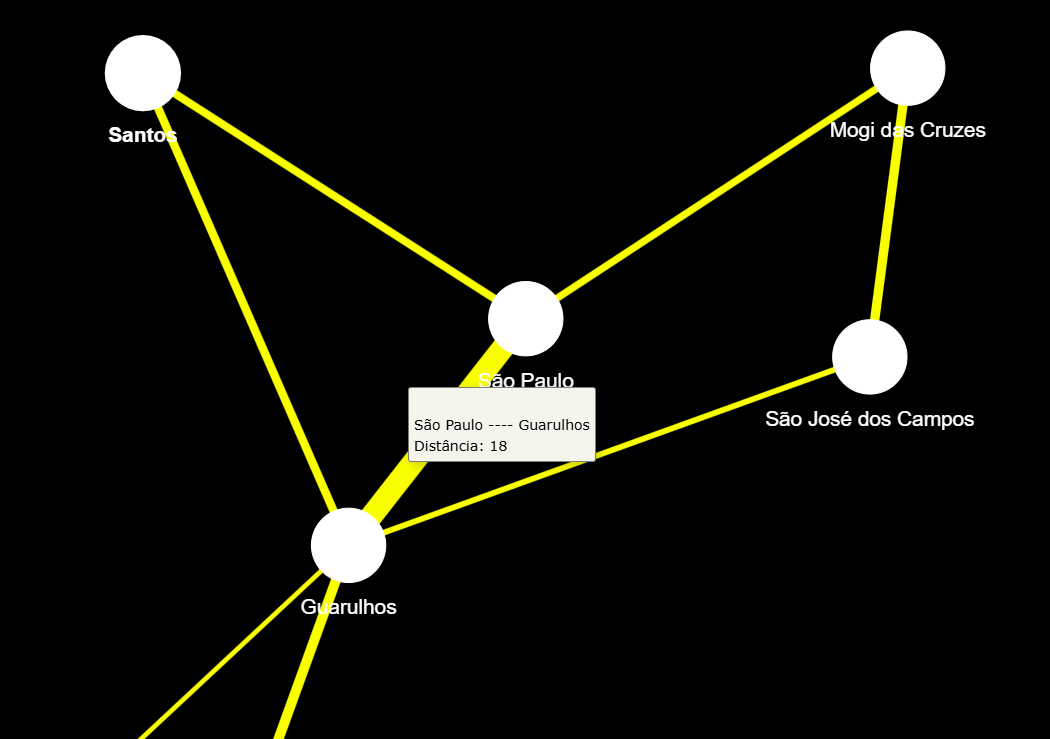

## **2. BFS, Breadth-First Search(2,0)**

In [93]:
# Método para encontrar índice dos vizinhos
def encontrar_vizinhos(cidades, atual):
  vizinhos = []
  i = 0
  for vizinho in cidades[atual]['vizinhos']:
    if(vizinho != 0):
      vizinhos.append(i)

    i += 1

  return vizinhos


# Método para iniciar a busca por largura (Breadth-First Search)
def bfs(cidades, inicio):
  visitas = [inicio]
  fila = [inicio]
  while fila != []:
    vizinhos = encontrar_vizinhos(cidades, fila[0])
    fila.pop(0)
    for vizinho in vizinhos:
      if(vizinho not in visitas):
        visitas.append(vizinho)
        fila.append(vizinho)

  return visitas


# Método para mostrar caminho
def mostrar_caminho(cidades, caminho):
  for cidade in caminho:
    print(cidades[cidade]['nome'])

> ## **2.1. Resultados (Testes)**

### Começando por Presidente Prudente

In [96]:
resultado = bfs(cidades, 7)
mostrar_caminho(cidades, resultado)

Presidente Prudente
Ribeirão Preto
Bauru
São Carlos
Campinas
Sorocaba
Jundiaí
Guarulhos
São Paulo
Santos
São José dos Campos
Mogi das Cruzes


### Começando por São Paulo

In [97]:
resultado = bfs(cidades, 0)
mostrar_caminho(cidades, resultado)

São Paulo
Santos
Guarulhos
Mogi das Cruzes
Campinas
São José dos Campos
Jundiaí
Sorocaba
São Carlos
Ribeirão Preto
Bauru
Presidente Prudente


## **3. Busca Informada (5,0)**

O algoritmo informado que será empregado na Entrega final será o Dijkstra. Porque o grafo escolhido apresenta apenas 12 vértices, o que torna o grafo relativamente pequeno. Também todos os pesos de arestas são positivos, o que é conveniente para o algoritmo.

In [36]:
# Seus Códigos aqui intercalados de células de texto com comentários

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [37]:
# Seus Códigos aqui intercalados de células de texto com comentários

# **Referências**

DIJIKSTRA'S ALGORITHM IN 3 MINUTES. Michael Sambol, 2014. Disponível em: https://youtu.be/_lHSawdgXpI?si=BuVkUr-3MnL6YE3B. Acesso em: 19 mar. 2025.

PYVIS. Documentation. Disponível em: https://pyvis.readthedocs.io/en/latest/documentation.html. Acesso em: 19 mar. 2025.


---

In [38]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [39]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7



,tia,nome,nota
0,10402758,CESAR HIDEKI IMAI,7.7
